#  Pipelines and composite estimators

### Pipeline: chaining estimators

Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

**Convenience and encapsulation**
  * You only have to call fit and predict once on your data to fit a whole sequence of estimators.
  
**Joint parameter selection**
  * You can grid search over parameters of all estimators in the pipeline at once.
  
**Safety** 
  * Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.


In [121]:
# Build pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe
Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

# Or use `from sklearn.pipeline import make_pipeline`

Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

### Nested parameters
Parameters of the estimators in the pipeline can be accessed using the \<estimator\>__\<parameter\> syntax:

In [123]:
pipe.set_params(clf__C=10)  # Set C in SVC to 10

# Especially useful with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = dict(reduce_dim__n_components=[2, 5, 10],clf__C=[0.1, 10, 100])
grid_search = GridSearchCV(pipe, param_grid=param_grid)



### Transforming target in regression
 
TransformedTargetRegressor transforms the targets y before fitting a regression model. The predictions are mapped back to the original space via an inverse transform. It takes as an argument the regressor that will be used for prediction, and the transformer that will be applied to the target variable:

### FeatureUnion: composite feature spaces


# Data Preprocessing

Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.

## Why is Data preprocessing important?

Preprocessing of data is mainly to check the data quality. The quality can be checked by the following

   * Accuracy: To check whether the data entered is correct or not.
   * Completeness: To check whether the data is available or not recorded.
   * Consistency: To check whether the same data is kept in all the places that do or do not match.
   * Timeliness: The data should be updated correctly.
   * Believability: The data should be trustable.
   * Interpretability: The understandability of the data.

**Major Tasks in Data Preprocessing:**
   1. Data cleaning
   2. Data integration
   3. Data reduction
   4. Data transformation


## 1. Standardization

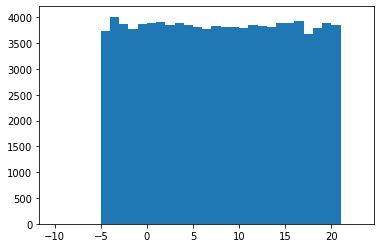

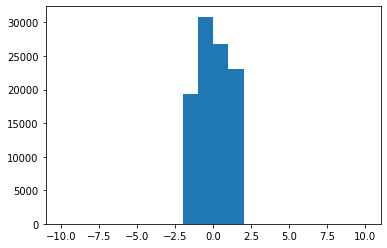

In [71]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Uniform distribution, merely rescale with variant and shift to zero
uniform = np.random.randint(-5,21,size=100000)
uniform = uniform.reshape(-1,1).astype(float)
scaler = preprocessing.StandardScaler().fit(uniform)

uniform_scaled = scaler.transform(uniform)

plt.hist(uniform.reshape(-1), bins=np.arange(-10,24,1))
plt.show()
plt.hist(uniform_scaled.reshape(-1), bins=np.arange(-10,11,1))
plt.show()

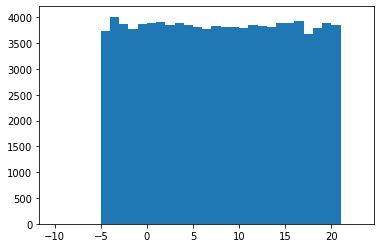

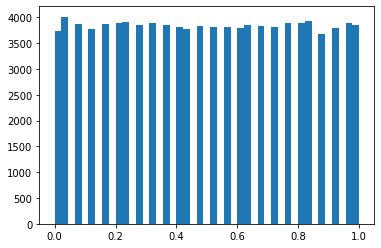

In [83]:
# min-max range scaler
min_max_scaler = preprocessing.MinMaxScaler()
scaler = min_max_scaler.fit(uniform)

min_max_scaled = scaler.transform(uniform)
plt.hist(uniform.reshape(-1), bins=np.arange(-10,24,1))
plt.show()
plt.hist(min_max_scaled.reshape(-1), bins='auto')
plt.show()

In [85]:
# Scaling sparse data
# Centering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. However, it can make sense to scale sparse inputs, especially if features are on different scales.
# MaxAbsScaler was specifically designed for scaling sparse data, and is the recommended way to go about this



'\nCentering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. However, it can make sense to scale sparse inputs, especially if features are on different scales.\nMaxAbsScaler was specifically designed for scaling sparse data, and is the recommended way to go about this\n'

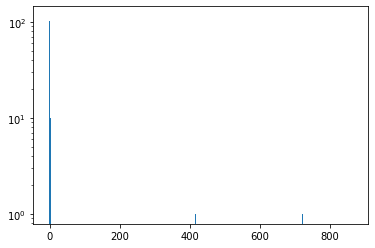

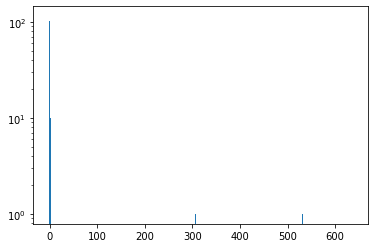

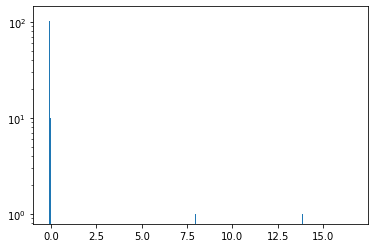

In [120]:
# Scaling data with outliers
# Scaling using the mean and variance of the data is likely to not work very well if there are many outliners. 
# In these cases, you can use RobustScaler as a drop-in replacement instead. 
# It uses more robust estimates for the center and range of your data.

# robust scaler
narrow_norm = np.random.normal(0,1,size=1000)
wide_uniform = np.random.randint(0,1000,size=10)
combine = np.concatenate((narrow_norm,wide_uniform))
combine = combine.reshape(-1,1)

robustscaler = preprocessing.RobustScaler()
scaler = robustscaler.fit(combine)

robust_scaled = scaler.transform(combine)
plt.hist(combine.reshape(-1), bins='auto')
plt.yscale("log")
plt.show()
plt.hist(robust_scaled.reshape(-1), bins='auto')
plt.yscale("log")
plt.show()

# standardScaler
scaler = preprocessing.StandardScaler().fit(combine)
standard_scaled = scaler.transform(combine)

plt.hist(standard_scaled.reshape(-1), bins='auto')
plt.yscale("log")
plt.show()

In [119]:
# Centering kernel matrices

# To be completed

[[ 3.76872566e-02]
 [-4.93465043e-01]
 [ 5.98110673e-01]
 ...
 [-9.15345612e-01]
 [-6.93332129e-02]
 [ 5.13317453e+02]]
[[ 3.39020509e-02]
 [-7.10098632e-01]
 [ 8.18903650e-01]
 ...
 [-1.30103918e+00]
 [-1.16004675e-01]
 [ 7.19000000e+02]]
